<a href="https://colab.research.google.com/github/Asheef1447/Antarctic-Sea-Ice-Plot-in-Python/blob/main/trial_composite.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np

import cartopy.crs as ccrs
import cartopy.mpl.ticker as cticker
from cartopy.util import add_cyclic_point

In [2]:
from google.colab import drive
drive.mount('/content/drive')

!ls "/content/drive/My Drive/Master's Thesis/Data"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
AVHRR_OISST_1985-2023.nc	 OSTIA_monthly_sea_ice.nc
Carbon-rep-monthly_1985-2021.nc  Sal_Den-sss-ssd-rep-monthly_1993-2021.nc


In [5]:
# Define the paths to the NetCDF files

path_ice = "/content/drive/My Drive/Master's Thesis/Data/OSTIA_monthly_sea_ice.nc"


In [6]:
# Open the files and store them in a Python variable
ice = xr.open_dataset(path_ice)

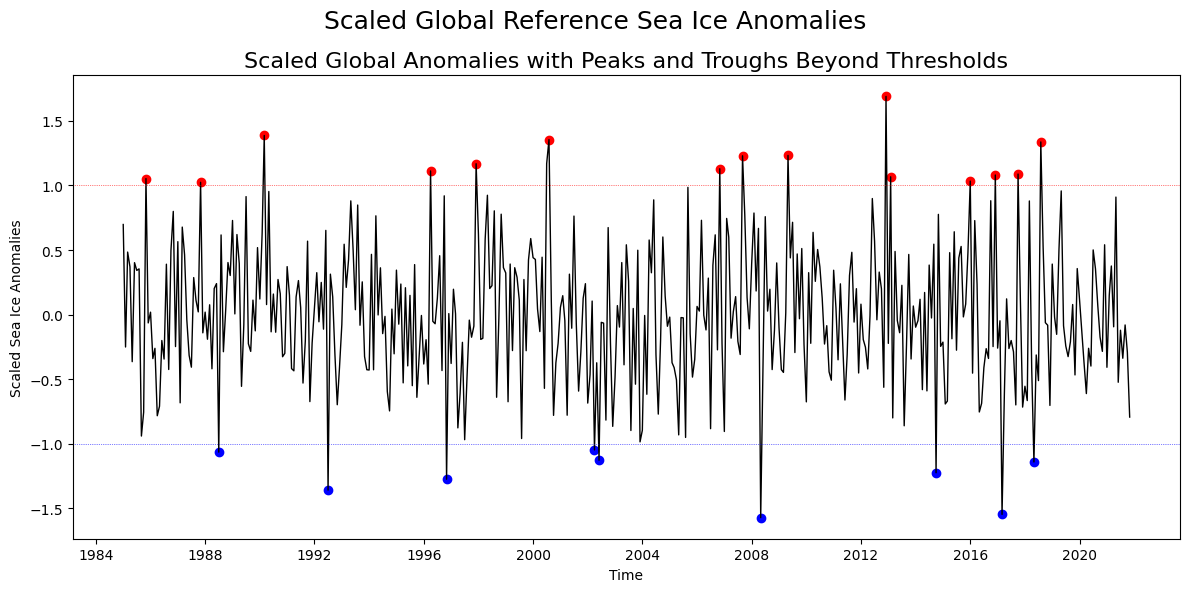

In [10]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt

# Sample data for demonstration (replace with your actual data)
time = np.arange('1985-01', '2021-12', dtype='datetime64[M]')  # Adjust the start date to your data's beginning
sea_ice_data = np.random.rand(len(time), 360, 720)  # Replace with your actual data

sea_ice = xr.Dataset({
    "time": time,
    "latitude": np.linspace(-90, 90, 360),
    "longitude": np.linspace(-180, 180, 720),
    "sea_ice_fraction": (["time", "latitude", "longitude"], sea_ice_data),
})

# Calculate climatology
sea_ice_climo = sea_ice.groupby('time.month').mean()

# Calculate anomalies
sea_ice_anoms = sea_ice.groupby('time.month') - sea_ice_climo

# Apply a scaling factor to magnify the values for visualization
scaling_factor = 1000  # Adjust this factor based on your data
anomalies_scaled = sea_ice_anoms["sea_ice_fraction"] * scaling_factor

# Define a threshold for high and low sea ice values
high_threshold = 1
low_threshold = -1

# Find peaks beyond the high threshold
from scipy.signal import find_peaks

peaks, _ = find_peaks(anomalies_scaled.mean(dim=("latitude", "longitude")), height=high_threshold)

# Invert the data to find troughs beyond the low threshold
inverted_anomalies = -anomalies_scaled.mean(dim=("latitude", "longitude"))
troughs, _ = find_peaks(inverted_anomalies, height=-low_threshold)

# Define the characteristics of the plot
fig, ax = plt.subplots(figsize=(12, 6))
fig.suptitle("Scaled Global Reference Sea Ice Anomalies", fontsize=18)

# Plot the scaled global anomalies time series
ax.plot(
    sea_ice["time"],
    anomalies_scaled.mean(dim=["latitude", "longitude"]),
    "-",
    color="black",
    linewidth=1,
    label="Scaled Global Anomalies"
)

# Plot circles for peaks beyond high threshold
ax.scatter(
    sea_ice["time"][peaks],
    anomalies_scaled.mean(dim=("latitude", "longitude"))[peaks],
    color="red",
    marker="o",
    label="Peaks beyond High Threshold"
)

# Plot circles for troughs beyond low threshold
ax.scatter(
    sea_ice["time"][troughs],
    anomalies_scaled.mean(dim=("latitude", "longitude"))[troughs],
    color="blue",
    marker="o",
    label="Troughs beyond Low Threshold"
)

# Add horizontal lines for thresholds
ax.axhline(high_threshold, color='red', linewidth=0.5, linestyle='dotted', label='High Threshold')
ax.axhline(low_threshold, color='blue', linewidth=0.5, linestyle='dotted', label='Low Threshold')

# Set title and labels for the subplot
ax.set_title("Scaled Global Anomalies with Peaks and Troughs Beyond Thresholds", fontsize=16)
ax.set_ylabel("Scaled Sea Ice Anomalies")
ax.set_xlabel("Time")


# Display the plot
plt.tight_layout()
plt.show()


In [ ]:
# Count the number of high and low sea ice years
num_high_sea_ice_years = high_sea_ice_mask.sum().item()
num_low_sea_ice_years = low_sea_ice_mask.sum().item()

# Print the counts
print('Number of High Sea Ice Years:', num_high_sea_ice_years)
print('Number of Low Sea Ice Years:', num_low_sea_ice_years)


Number of High Sea Ice Years: [[226 222 231 ... 232 207 218]
 [203 236 223 ... 223 195 226]
 [247 227 210 ... 207 224 232]
 ...
 [217 232 247 ... 229 202 239]
 [252 205 224 ... 210 216 219]
 [213 221 221 ... 205 234 243]]
Number of Low Sea Ice Years: [[218 219 213 ... 212 236 226]
 [241 207 221 ... 217 245 218]
 [195 216 234 ... 236 220 212]
 ...
 [226 212 197 ... 213 242 205]
 [192 239 219 ... 233 228 223]
 [231 221 221 ... 238 209 200]]


In [8]:
# Define the paths to the NetCDF files

path_carbon = "/content/drive/My Drive/Master's Thesis/Data/Carbon-rep-monthly_1985-2021.nc"

# Open the files and store them in a Python variable

carbon = xr.open_dataset(path_carbon)

In [ ]:
carbon['fgco2']

<xarray.DataArray 'fgco2' (time: 444, latitude: 173, longitude: 360)>
[27652320 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 1985-01-15 1985-02-15 ... 2021-12-15
  * latitude   (latitude) float32 -82.5 -81.5 -80.5 -79.5 ... 87.5 88.5 89.5
  * longitude  (longitude) float32 0.5 1.5 2.5 3.5 ... 356.5 357.5 358.5 359.5
Attributes:
    long_name:      Surface downward flux of total CO2
    standard_name:  surface_downward_mass_flux_of_carbon_dioxide_expressed_as...
    units:          molC m-2 yr-1
    _ChunkSizes:    [  1 173 360]

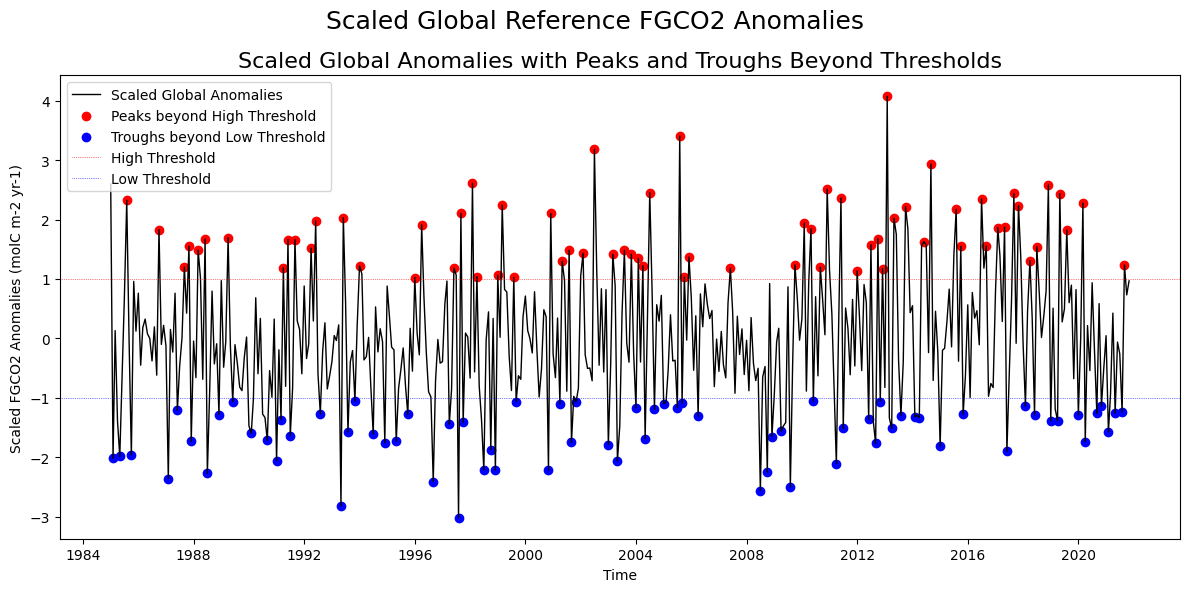

In [11]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt

# Sample data for demonstration (replace with your actual data)
time = np.arange('1985-01', '2021-12', dtype='datetime64[M]')  # Adjust the start date to your data's beginning
fgco2_data = np.random.rand(len(time), 173, 360)  # Replace with your actual data

fgco2 = xr.Dataset({
    "time": time,
    "latitude": np.linspace(-82.5, 89.5, 173),
    "longitude": np.linspace(0.5, 359.5, 360),
    "fgco2": (["time", "latitude", "longitude"], fgco2_data),
})

# Calculate climatology
fgco2_climo = fgco2.groupby('time.month').mean()

# Calculate anomalies
fgco2_anoms = fgco2.groupby('time.month') - fgco2_climo

# Apply a scaling factor to magnify the values for visualization
scaling_factor = 1000  # Adjust this factor based on your data
anomalies_scaled = fgco2_anoms["fgco2"] * scaling_factor

# Define a threshold for high and low fgco2 values
high_threshold = 1
low_threshold = -1

# Find peaks beyond the high threshold
from scipy.signal import find_peaks

peaks, _ = find_peaks(anomalies_scaled.mean(dim=("latitude", "longitude")), height=high_threshold)

# Invert the data to find troughs beyond the low threshold
inverted_anomalies = -anomalies_scaled.mean(dim=("latitude", "longitude"))
troughs, _ = find_peaks(inverted_anomalies, height=-low_threshold)

# Define the characteristics of the plot
fig, ax = plt.subplots(figsize=(12, 6))
fig.suptitle("Scaled Global Reference FGCO2 Anomalies", fontsize=18)

# Plot the scaled global anomalies time series
ax.plot(
    fgco2["time"],
    anomalies_scaled.mean(dim=["latitude", "longitude"]),
    "-",
    color="black",
    linewidth=1,
    label="Scaled Global Anomalies"
)

# Plot circles for peaks beyond high threshold
ax.scatter(
    fgco2["time"][peaks],
    anomalies_scaled.mean(dim=("latitude", "longitude"))[peaks],
    color="red",
    marker="o",
    label="Peaks beyond High Threshold"
)

# Plot circles for troughs beyond low threshold
ax.scatter(
    fgco2["time"][troughs],
    anomalies_scaled.mean(dim=("latitude", "longitude"))[troughs],
    color="blue",
    marker="o",
    label="Troughs beyond Low Threshold"
)

# Add horizontal lines for thresholds
ax.axhline(high_threshold, color='red', linewidth=0.5, linestyle='dotted', label='High Threshold')
ax.axhline(low_threshold, color='blue', linewidth=0.5, linestyle='dotted', label='Low Threshold')

# Set title and labels for the subplot
ax.set_title("Scaled Global Anomalies with Peaks and Troughs Beyond Thresholds", fontsize=16)
ax.set_ylabel("Scaled FGCO2 Anomalies (molC m-2 yr-1)")
ax.set_xlabel("Time")

# Add legend
ax.legend()

# Display the plot
plt.tight_layout()
plt.show()


After encountering several RAM errors, I decided to isolate and run only this specific portion of the code, while ignoring the rest. This was done in an attempt to allocate the entire available RAM to this particular section of the code. Unfortunately, even after these efforts, the code still failed to execute

In [3]:
# Sea ice data
ice = xr.open_dataset("/content/drive/My Drive/Master's Thesis/Data/OSTIA_monthly_sea_ice.nc")

# Carbon data
carbon = xr.open_dataset("/content/drive/My Drive/Master's Thesis/Data/Carbon-rep-monthly_1985-2021.nc")

In [ ]:
# Climatology
ice_climo = ice.sea_ice_fraction.groupby('time.month').mean()
carbon_climo = carbon.fgco2.groupby('time.month').mean()

# Anomalies
ice_anoms = ice.sea_ice_fraction.groupby('time.month') - ice_climo
carbon_anoms = carbon.fgco2.groupby('time.month') - carbon_climo

# Thresholds
high_threshold = 1
low_threshold = -1

# Identify high and low years
high_ice_years = ice_anoms.where(ice_anoms > high_threshold).dropna('time')['time']
low_ice_years = ice_anoms.where(ice_anoms < low_threshold).dropna('time')['time']

# Select and average carbon anomalies
high_carbon = carbon_anoms.sel(time=high_ice_years)['fgco2']
low_carbon = carbon_anoms.sel(time=low_ice_years)['fgco2']

high_carbon_avg = high_carbon.mean(dim='time')
low_carbon_avg = low_carbon.mean(dim='time')

# Print averages
print([high_carbon_avg, low_carbon_avg])